# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Info

In [5]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Tích hợp dữ liệu/data/final_.csv'

hotel_info = pd.read_csv(PATH)
hotel_info.columns

Mounted at /content/drive


Index(['name', 'img_url', 'city', 'address', 'url1', 'url2', 'url3', 'url4',
       'min_price', 'price1', 'price2', 'price3', 'price4', 'stars1', 'stars2',
       'stars3', 'stars4', 'description', 'number_review', 'nearby_places',
       'facilities', 'mean_rating', 'mean_stars', 'slug'],
      dtype='object')

In [ ]:
cols = ['name', 'city', 'price', 'stars', 'rating', 'number_review', 'facilities']
hotels = hotel_info[cols]
hotels[hotels['stars'] > 5]['stars'] = 5
hotels.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469
name,RedDoorz ở Đường Phạm Ngũ Lão 3 (RedDoorz @ Ph...,OYO 520 Friendly Homestay,RedDoorz @ Nguyen Kiem Street,Khách sạn Lotus Central,Khách sạn Winston Riverside (Hotel Winston Riv...,RedDoorz near Gia Dinh International Hospital 4,Hello SaiGon Homestay,The Luxe Hotel,Saigon One Service Apartment,Khách sạn Hà My (Ha My Hotel),Khách sạn The Junction Hai Bà Trưng (The Junct...,Nhat Ha L'Opera,Thuy Sakura Hotel & Serviced Apartment,Khách sạn RedDoorz Plus Vienna (RedDoorz Plus ...,OYO 422 Khách Sạn Nguyên Thanh (OYO 422 Nguyen...,Khách sạn Roseland Corp,Sao Nam Hotel - Bui Vien Walking Street,Khách sạn A25 - 14 Lương Hữu Khánh (A25 Hotel ...,Icon Saigon - LifeStyle Design Hotel,Khách sạn Bích Duyên,Khách Sạn Cochin Zen,The Odys Boutique Hotel,Khách sạn Royal Sài Gòn,Khách Sạn OYO 476 Văn Anh (OYO 476 Van Anh Hotel),Khách sạn Gia Viên,Liberty Hotel Saigon Greenview,OYO 373 Khách Sạn Habana (OYO 373 Habana Hotel),Khách sạn Silverland Jolie,Silverland Sakyo Hotel,Khách sạn Dyn Opera,Chez Mimosa Boutique Corner,Khách sạn RedDoorz Plus Amore ở đường Nguyễn T...,Vuong Quang Hotel,RedDoorz tại phố đi bộ Bùi Viện (RedDoorz @ Bu...,Maison De Camille Boutique Hotel,Khách Sạn Bin Bin 2 - Gần Him Lam Q.7 (Bin Bin...,Alagon Plus Hotel & Spa,Akoya Saigon Central Hotel,Khách sạn Silverland Charner,Khách sạn Orchids Saigon,...,Hà Nội Passion Suite Hotel,InterContinental Hanoi Westlake,Khách sạn Hanoi La Castela,Luxury Backpackers,Khách Sạn Azumaya Linh Lang,Bao Hung Hotel and Apartment,New Vision Palace Hotel,Khách sạn Âu Việt,The Bloom Ha Noi,Khách sạn Hanoi Sky,Khách sạn Thang Long Espana,NaN,Hanoi HM Boutique Hotel,Dal Vostro Hotel & Spa,O'Gallery Premier Hotel & Spa,Hanoi La Storia Hotel,The Palmy Hotel & Spa,Anatole Hotel Hanoi,Lotte Hotel Hanoi,Khách sạn Amorita Boutique,Pan Pacific Hanoi,JM Marvel Hotel & Spa,Sofitel Legend Metropole Hà Nội,The Hanoi Club Hotel & Residences,The Queen Hotel & Spa,Classy Holiday Hotel & Spa,Hanoi Esplendor Hotel and Spa,Khách sạn Fortuna Hanoi,Melia Hanoi,Khách sạn Trang Trang Premium,My Hotel 23,MK Premier Boutique Hotel,Khách sạn Little Diamond,Hovi De Bali,Night Hotel,Khách sạn Mường Thanh Grand Hà Nội,Silk Queen Grand Hotel,A25 Hotel & Spa,Dream Hotel & Apartment,Khách sạn Lenid De Hồ Gươm\n(Lenid De Ho Guom ...
city,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
price,248182,316537,279152,737662,409091,254227,287879,413737,445811,285714,270000,937013,783333,405921,201532,619114,220000,341991,671750,350649,599999,558953,733437,229466,254545,499999,229466,498701,737504,351450,314701,438136,381360,261818,599999,298636,500490,315900,663351,865313,...,545455,1.51222e+06,327273,89610,899999,695478,363972,623377,672088,251602,576234,1e+07,586770,596946,586336,441308,757616,926277,3.52852e+06,368000,2.11513e+06,882514,3.51211e+06,1.09754e+06,169750,391250,642052,2.00326e+06,2.21817e+06,407951,563479,498865,179000,550000,555288,972727,584495,1.25065e+06,1.126e+06,519481
stars,2,2,2,4,3,3,3,3,3,2,3,4,3.5,2,2,3,2,2,4,2.5,4,4,4,2,2.5,3,2,4,4,3.5,4,3,2,2,3,1,4,3.5,4,4,...,3,5,3.5,3,3.5,3,3,3.5,3,3.5,3,NaN,3,4,4,3,3.5,4,5,3,5,4,5,4.5,3,3.5,3.5,4.5,5,3,3,3.5,3,3,3,4,4,4,3.5,3
rating,7.8,8.5,7.9,8.9,9.3,7.8,9.2,8.2,9.7,8.4,8.2,8.4,7.4,8.7,7.3,8.3,7.7,7.8,8.6,8.8,8.2,8.5,7.9,6.9,8,7.9,6.3,8.6,8.6,8.7,9.1,9.4,7.8,7.2,8.9,8.5,8.3,8.9,8.8,8.7,...,8.2,8.8,9.6,9,8.3,9.2,9.3,7.9,9.5,8.3,7.9,NaN,9,8.7,9,8.3,8.8,8.9,9,8.6,8.7,8.1,9.2,8.7,8.4,8.9,8.8,8.8,8.6,8.7,8.7,8.8,8.8,9.6,8.6,8.5,7,9,9.1,8.5
number_review,56,148,200,546,32,27,289,159,76,221,547,182,246,15,106,98,161,130,69,497,36,1055,291,23,361,172,121,959,586,1274,1516,33,472,1206,598

In [ ]:
hotels.describe().drop('count')

,city,price,stars,rating,number_review
mean,2.248936,8.458169e+05,3.343750,8.248608,215.912766
std,0.693980,1.296243e+06,2.609346,0.785308,290.799858
min,1.000000,4.553700e+04,0.000000,5.000000,0.000000
25%,2.000000,3.501360e+05,2.500000,7.800000,19.000000
50%,2.000000,5.244210e+05,3.000000,8.500000,89.000000
75%,3.000000,8.098810e+05,4.000000,8.800000,295.750000
max,3.000000,1.000000e+07,45.000000,9.900000,1836.000000


# Check no-info values

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           467 non-null    object 
 1   city           470 non-null    int64  
 2   price          470 non-null    float64
 3   stars          464 non-null    float64
 4   rating         467 non-null    float64
 5   number_review  470 non-null    float64
 6   facilities     467 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 25.8+ KB


In [ ]:
na_percent = hotels.isna().sum() / hotels.count() * 100
na_percent

name             0.642398
city             0.000000
price            0.000000
stars            1.293103
rating           0.642398
number_review    0.000000
facilities       0.642398
dtype: float64

# Visualize some features

In [ ]:
hotels['city'].unique()

array([3, 2, 1])

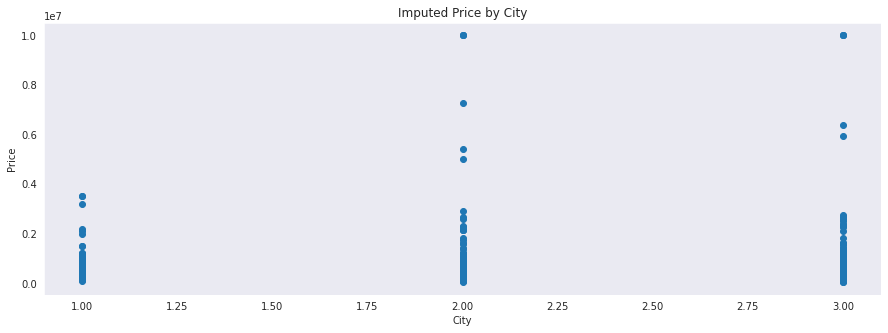

In [ ]:
x = hotels['city']
y = hotels['price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()

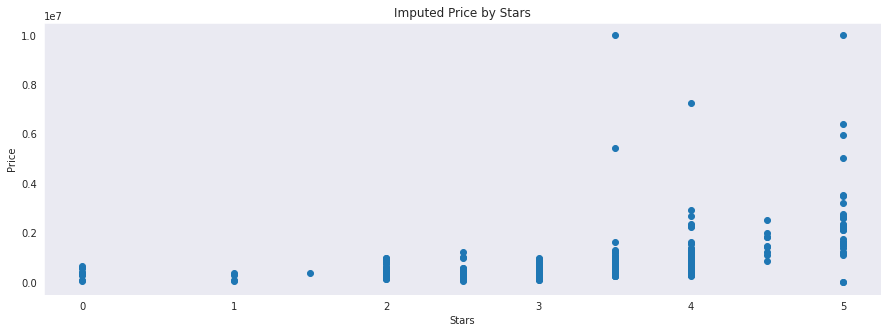

In [ ]:
x = hotels['stars']
y = hotels['price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by Stars')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()

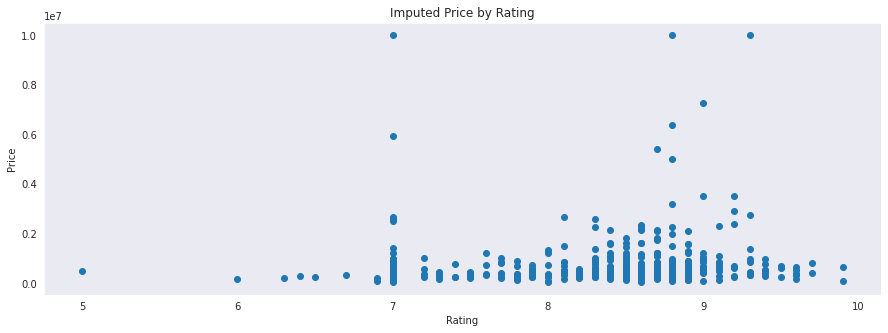

In [ ]:
x = hotels['rating']
y = hotels['price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()

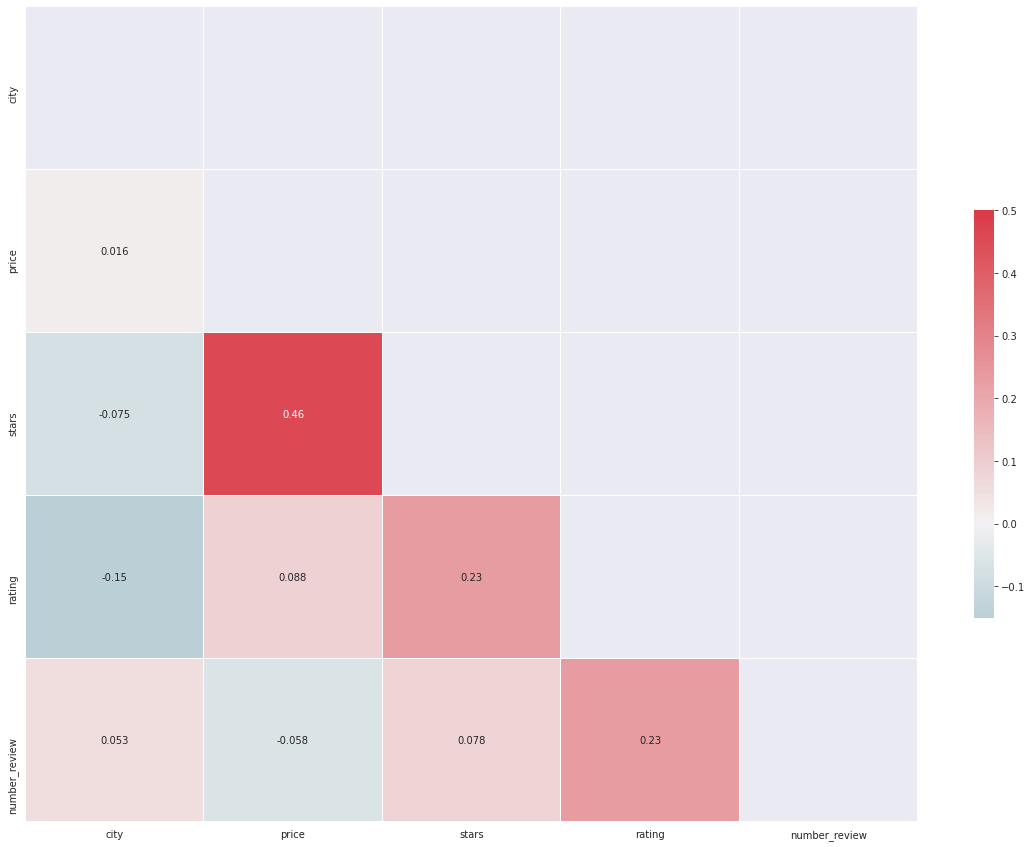

In [ ]:
sns.set_style('dark')
corr = hotels.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True,
            linewidths=.2, cbar_kws={"shrink": .5})

# Handle missing values

# Some predictions